In [1]:
import numpy as np
import pandas as pd
from difflib import SequenceMatcher as s
import re
import itertools
#from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='cp850')

Sort publisher alphabetically

In [3]:
df = df.sort_values('Publisher')

Clean column names for easier use

In [4]:
fix_cols = df.columns.str.replace(' ', '_').str.lower().str.replace('/', '_')
df.columns = fix_cols

Clean numeric data and convert to float

In [5]:
df.head()

,pmid_pmcid,publisher,journal_title,article_title,cost_(ú)_charged_to_wellcome_(inc_vat_when_charged)
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,ú2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",ú642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,ú669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,ú685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,ú2392.20


In [6]:
df.iloc[:,4] = df.iloc[:,4].str.replace('£','')
df.iloc[:,4] = df.iloc[:,4].str.replace('ú','')
df.iloc[:,4] = df.iloc[:,4].str.strip()
df.iloc[:,4] = df.iloc[:,4].str.replace('$','')
df.iloc[:,4] = df.iloc[:,4].astype('float')

numeric data cleaning end

start cleaning publishers

In [7]:
start_journ = len(df.journal_title.unique())

In [8]:
start_pub = len(df.publisher.unique())
start_pub

299

In [9]:
df.publisher = df.publisher.str.strip().str.lower() #strip whitespace and convert to lowercase
df.publisher = df.publisher.str.replace('(','').str.replace(')','') #eliminate parenthases
df.publisher = df.publisher.str.replace('/',' ').str.replace('-',' ') #eliminate / and -
df.publisher = df.publisher.str.replace(' & ',' and ') #replace ' & ' with ' and '

In [10]:
singles = list(df[df.publisher.str.isalpha()].publisher.unique())
range_singles = np.arange(len(singles))

In [11]:
for i in range_singles:
    val = singles[i]
    this = list(df[df.publisher.str.contains(singles[i])].publisher.unique())
    df.replace(this, val, inplace=True)

In [12]:
acronym_dict = {'acs': 'american chemical society',
                'ambsb': 'american society for biochemistry and molecular biology',
                'asbmb': 'american society for biochemistry and molecular biology',
                'asm': 'american society for microbiology',
                'bmc': 'biomed central',
                'bmj': 'british medical journal',
                'cshlp': 'cold spring harbor laboratory press',
                'cup': 'cambridge university press',
                'faseb': 'federation of american societies for experimental biology',
                'jove': 'journal of visualized experiments',
                'lww': 'lippincot williams and wilkins',
                'oup': 'oxford university press',
                'plos': 'public library of science',
                'pnas': 'proceedings of the national academy of sciences',
                'rsc': 'royal society of chemistry'
               }
df.replace(acronym_dict, inplace=True)

In [13]:
#spell = SpellChecker()
#words = ' '.join(list(df.publisher.unique())).split(' ')
#mispelled = spell.unknown(words)
#mispell_dict = {}
#for word in mispelled:
#    mispell_dict[word] = spell.correction(word)

In [14]:
mispell_dict = {'wliey': 'wiley',
 'socety': 'society',
 'biolgy': 'biology',
 'biology,': 'biology',
 'biolgists': 'biologists',
 'endocrinolog': 'endocrinology',
 'sciences,': 'sciences',
 'benthan': 'bentham',
 'hamatology': 'haematology',
 'clearace': 'clearance',
 'liebert,': 'liberty',
 'byophysical': 'biophysical',
 'endrocrine': 'endocrine',
 'univesity': 'university',
 'elseveier': 'elsevier',
 'hematology': 'haematology',}

In [15]:
for key in mispell_dict:
    df.publisher = df.publisher.str.replace(key, mispell_dict[key])

In [16]:
def similar(a, b):
    return s(None, a, b).ratio()

In [17]:
#pub_unique = df.publisher.unique()
#pub_combos = list(itertools.combinations(pub_unique, 2))
#sim_pubs = {}
#for i in np.arange(0, len(pub_combos)):
#    a = pub_combos[i][0]
#    b = pub_combos[i][1]
#    if similar(a, b) > .8:
#        sim_pubs[b] = a

In [18]:
sim_pubs = {
 'american soc for biochemistry and molecular biology': 'american society for biochemistry and molecular biology',
 'the american society for biochemistry and molecular biology': 'american society for biochemistry and molecular biology',
 'the american society for biochemistry and molecular biology inc': 'american society for biochemistry and molecular biology',
 'biomed central ltd': 'biomed central',
 'biomed central limited': 'biomed central',
 'the american physiological society': 'american physiological society',
 'cold spring harbor': 'cold spring harbor press',
 'cambridge uni press': 'cambridge university press',
 'cambridge univ press': 'cambridge university press',
 'darmouth journal services': 'dartmouth journal services',
 'cold spring habour press': 'cold spring harbor press',
 'company of biologist': 'company of biologists',
 'company of biologists ltd': 'company of biologists',
 'the company of biologists': 'company of biologists',
 'the company of biologists ltd': 'company of biologists',
 'dartmouth journals': 'dartmouth journal services',
 'the endocrine society': 'endocrine society',
 'federation of the american society of experimental biology': 'federation of american societies for experimental biology',
 'future medicine ltd': 'future medicine',
 'impact journals llc': 'impact journals',
 'international union of crystallography iucr': 'international union of crystallography',
 'the journal of visualized experiments': 'journal of visualized experiments',
 'landes biosciences': 'landes bioscience',
 'mary ann liebert inc': 'mary ann liebert',
 'national academy of sciences usa': 'national academy of sciences',
 'oxford univ press': 'oxford university press',
 'portland press ltd': 'portland press',
 'publisher society for endocrinologyy': 'society for endocrinologyy',
 'royal society for chemistry': 'royal society of chemistry',
 'the royal college of psychiatrists': 'royal college of psychiatrists',
 'the royal society': 'royal society',
 'society of neuro sciences': 'society for neuroscience',
 'society for neurosciences': 'society for neuroscience',
 'society of neuroscience': 'society for neuroscience',
 'the sheridan press': 'sheridan press',
 'society for genermal microbiology': 'society for general microbiology',
 'society of general microbiology': 'society for general microbiology',
 'society of leukocyte biology': 'society for leukocyte biology',
 'wolters kluwers': 'wolters kluwer'}

In [19]:
df.replace(sim_pubs, inplace=True)

In [20]:
#pub_unique = df.publisher.unique()
#pub_combos = list(itertools.combinations(pub_unique, 2))
#sim_pubs = {}
#for i in np.arange(0, len(pub_combos)):
#    a = pub_combos[i][0]
#    b = pub_combos[i][1]
#    if similar(a, b) > .7:
#        sim_pubs[b] = a

In [21]:
sim_pubs = {
 'american chemical society publications': 'american chemical society',
 'american psychiatric publishing': 'american psychiatric association',
 'royal society': 'biophysical society',
 'cold spring harbor laboratory press': 'cold spring harbor press',
 'cold spring harbor publications': 'cold spring harbor press',
 'future science': 'future medicine',
 'informa healthcare communications': 'informa healthcare',
 'proceedings of the national academy of sciences': 'national academy of sciences',
 'taylor and francis journals': 'taylor and francis',
 'wolters kluwer health': 'wolters kluwer'}

In [22]:
df.replace(sim_pubs, inplace=True)

In [23]:
#pub_unique = df.publisher.unique()
#pub_combos = list(itertools.combinations(pub_unique, 2))
#sim_pubs = {}
#for i in np.arange(0, len(pub_combos)):
#    a = pub_combos[i][0]
#    b = pub_combos[i][1]
#    if similar(a, b) > .5:
#        sim_pubs[b] = a

In [24]:
sim_pubs = {
 'american physiological society': 'association for psychological science',
 'elsevier science': 'elsevier',
 'cambridge journals': 'cambridge university press',
 'oxford journals': 'oxford university press',
 'mary ann liberty inc. publishers': 'mary ann liebert',
 'iop publishing': 'institute of physics' ,
 'mit press open access': 'mit press',
 'national academy of sciences of the united states of america': 'national academy of sciences',
 'wolters kluwer n.v. lippinott': 'wolters kluwer'}

In [25]:
df.replace(sim_pubs, inplace=True)

In [26]:
df = df.sort_values('publisher')

In [27]:
sim_pubs = {'berhahn books':'berghahn books',
 'camdus journal services': 'cadmus',
 't&f': 'taylor and francis',
 'wiley blackwell': 'wiley'}

In [28]:
df.replace(sim_pubs, inplace=True)

# Top 5 Publishers

In [29]:
df.publisher.value_counts().head(5)

elsevier                     409
public library of science    307
wiley                        270
oxford university press      167
biomed central                96
Name: publisher, dtype: int64

In [30]:
df.columns = ['pmid_pmcid',
 'publisher',
 'journal_title',
 'article_title',
 'cost']

Get rid of outliers in the cost data 3 or more standard deviations out

In [31]:
df = df[(np.abs(stats.zscore(df.cost)) < 3)]

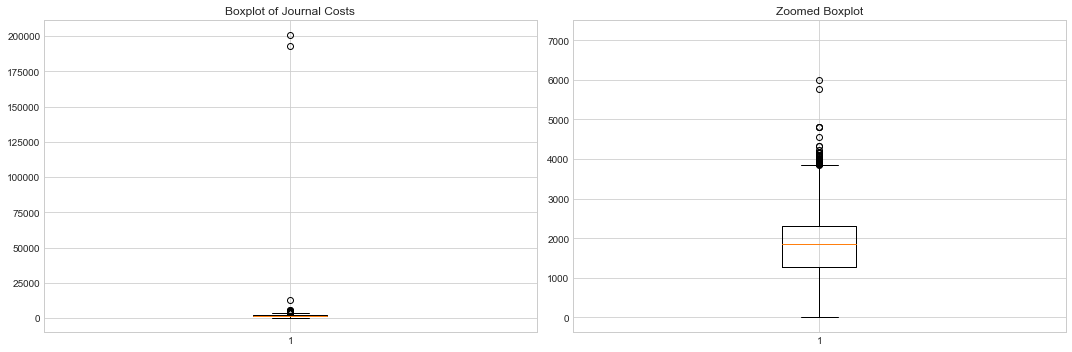

In [32]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(15,5))

plt.subplot(122)
plt.boxplot(df.cost)
plt.ylim((-375,7500))
plt.title('Zoomed Boxplot')

plt.subplot(121)
plt.boxplot(df.cost)
plt.title('Boxplot of Journal Costs')

plt.tight_layout()
plt.show()

In [33]:
df_cent_cost = df.groupby('publisher').agg({'cost': ['mean','median','std']})

# Mean, median and std for each publisher

In [34]:
df_cent_cost

cost                        
                                               mean    median           std
publisher                                                                  
aga institute                            238.080000   238.080           NaN
american association of immunologists   2571.540000  2571.540    758.782145
american chemical society               1262.137333  1277.480    628.206705
american college of chest physicians    2383.940000  2383.940           NaN
american psychiatric association        2350.875000  2350.875      1.209153
...                                             ...       ...           ...
the boulevard                           2421.960000  2421.960           NaN
transcript verlag                       1653.020000  1653.020           NaN
university of the basque country press  1306.110000  1306.110           NaN
wiley                                   2758.961955  2007.740  12207.951008
wolters kluwer                          1857.793333  1836.920    280.825618

[95 rows x 3 columns]